In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_gaussian_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_gaussian_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_gaussian_noisy = np.clip(x_train_gaussian_noisy, 0., 1.)
x_test_gaussian_noisy = np.clip(x_test_gaussian_noisy, 0., 1.)

In [13]:
# Add Salt and Pepper noise to the images
noise_factor = 0.5
img_size = x_test[0].size
noise_size = int(noise_factor * img_size)

x_train_saltpepper_noisy = x_train.copy()
x_test_saltpepper_noisy = x_test.copy()

for i in range(x_train.shape[0]):
  random_indices = np.random.choice(img_size, noise_size)
  noise = np.random.choice([0., 1.], noise_size)
  x_train_saltpepper_noisy[i].flat[random_indices] = noise

for i in range(x_test.shape[0]):
  random_indices = np.random.choice(img_size, noise_size)
  noise = np.random.choice([0., 1.], noise_size)
  x_test_saltpepper_noisy[i].flat[random_indices] = noise

In [16]:
# Add Speckle Noise to the images
noise_factor = 0.5

x_train_speckle_noisy = x_train.copy()
x_test_speckle_noisy = x_test.copy()
for i in range(x_train.shape[0]):
  x_train_speckle_noisy[i] = x_train_speckle_noisy[i] + noise_factor * np.random.rand(28, 28, 1)
  x_train_speckle_noisy[i] = np.clip(x_train_speckle_noisy[i], 0., 1.)

for i in range(x_test.shape[0]):
  x_test_speckle_noisy[i] = x_test_speckle_noisy[i] + noise_factor * np.random.rand(28, 28, 1)
  x_test_speckle_noisy[i] = np.clip(x_test_speckle_noisy[i], 0., 1.)

In [25]:
# Add Poisson Noise to the images
x_train_poisson_noisy = np.random.poisson(x_train)
x_test_poisson_noisy = np.random.poisson(x_test)
x_train_poisson_noisy = x_train_poisson_noisy.astype('float32')
x_test_poisson_noisy = x_test_poisson_noisy.astype('float32')

In [17]:
def psnr(y_true, y_pred, max_val=1.0):
  """Computes the peak signal-to-noise ratio (PSNR) between two images.

  Args:
    y_true: The ground truth image tensor.
    y_pred: The predicted image tensor.
    max_val: The maximum pixel value in the images.

  Returns:
    The PSNR value as a scalar tensor.
  """

  mse = tf.reduce_mean(tf.square(y_true - y_pred))
  psnr_value = 20 * tf.math.log(max_val / tf.sqrt(mse)) / tf.math.log(10.0)
  return psnr_value

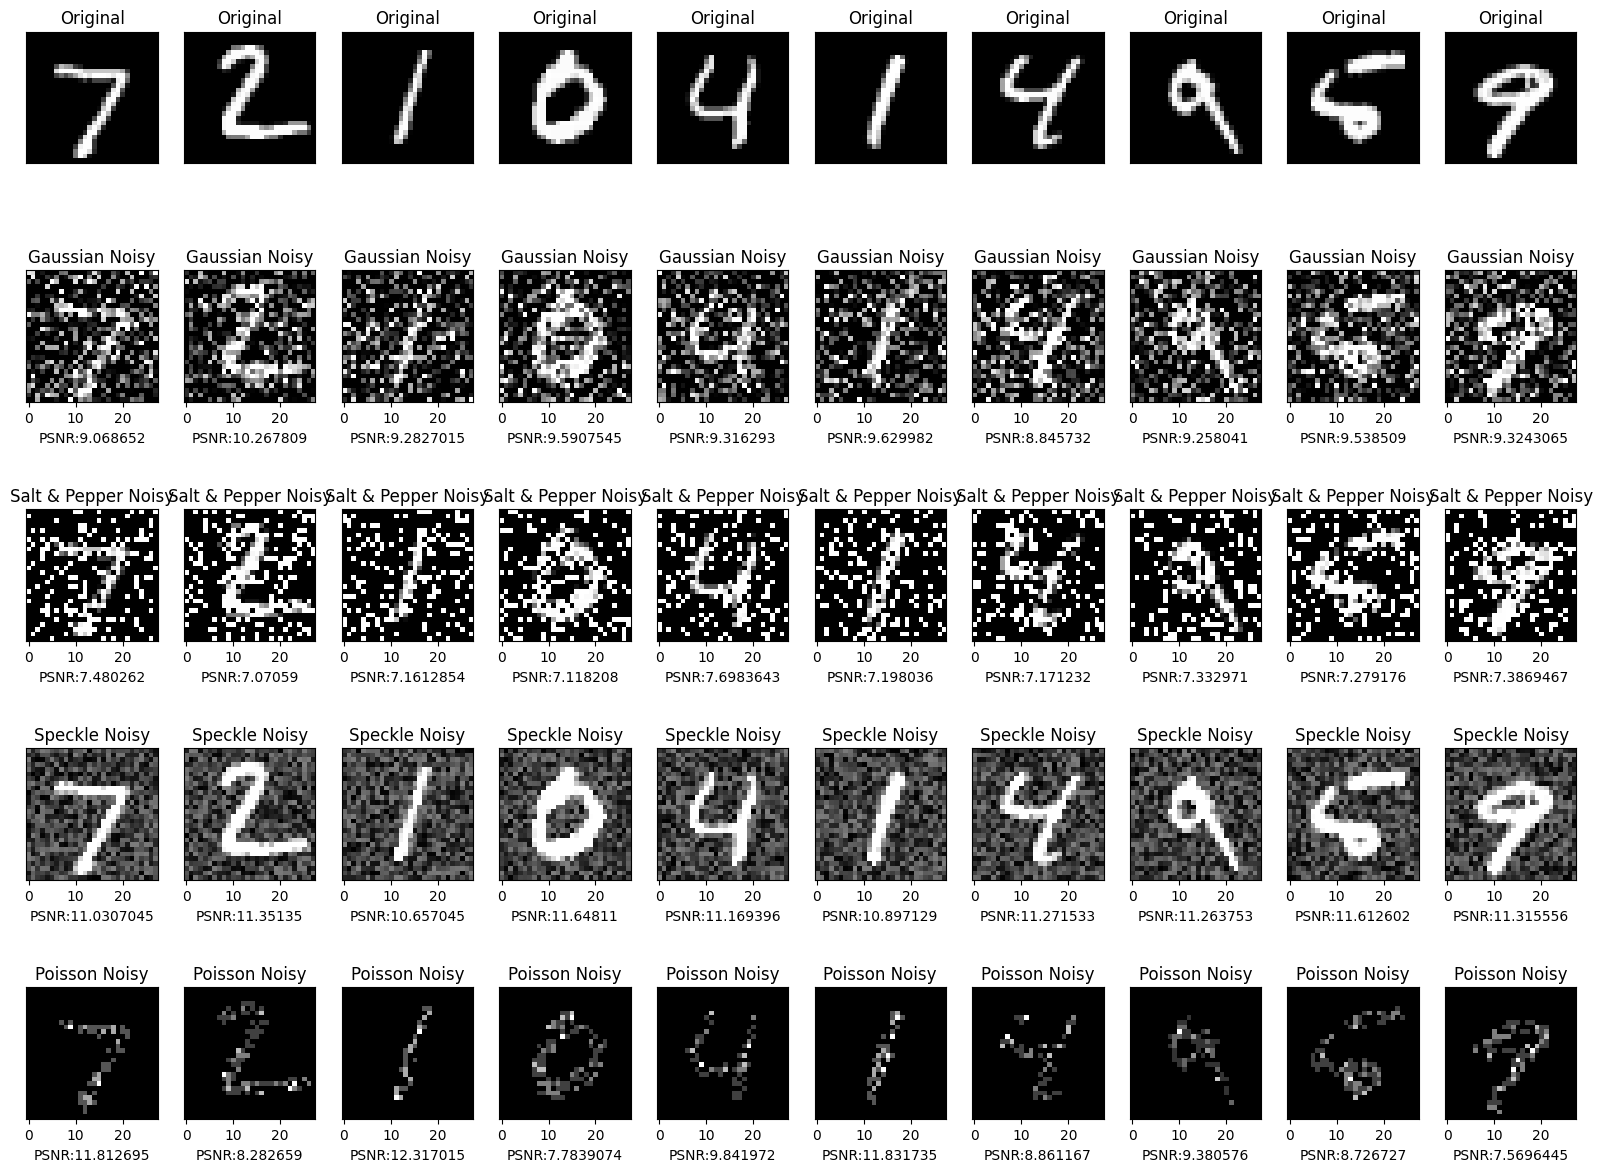

In [27]:
# Display original and noisy images
n = 10
plt.figure(figsize=(20, 15))
for i in range(n):
    # Original images
    ax = plt.subplot(5, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Gaussian Noisy images
    ax = plt.subplot(5, n, i + 1 + n)
    plt.imshow(x_test_gaussian_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Gaussian Noisy")
    diff = psnr(x_test[i], x_test_gaussian_noisy[i].astype('float32'))
    plt.xlabel('PSNR:'+str(tf.get_static_value(diff)))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)

    # Salt and Pepper Noise
    ax = plt.subplot(5, n, i + 1 + n + n)
    plt.imshow(x_test_saltpepper_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Salt & Pepper Noisy")
    diff = psnr(x_test[i], x_test_saltpepper_noisy[i])
    plt.xlabel('PSNR:'+str(tf.get_static_value(diff)))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)

    # Speckle Noise
    ax = plt.subplot(5, n, i + 1 + n + n + n)
    plt.imshow(x_test_speckle_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Speckle Noisy")
    diff = psnr(x_test[i], x_test_speckle_noisy[i])
    plt.xlabel('PSNR:'+str(tf.get_static_value(diff)))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)

    # Poisson Noise
    ax = plt.subplot(5, n, i + 1 + n + n + n + n)
    plt.imshow(x_test_poisson_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Poisson Noisy")
    diff = psnr(x_test[i], x_test_poisson_noisy[i])
    plt.xlabel('PSNR:'+str(tf.get_static_value(diff)))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)

plt.show()